In [4]:
import pandas as pd
import numpy as np

# Creating the treatment dataframe equivalent in Python
treatment_data = {
    'person': ["Derrick Whitmore", np.nan, np.nan, "Katherine Burke"],
    'treatment': [1, 2, 3, 1],
    'response': [7, 10, np.nan, 4]
}

treatment = pd.DataFrame(treatment_data)

# Equivalent of `fill(everything())` in R's tidyr
treatment.fillna(method='ffill', inplace=True)

# Equivalent of `coalesce()` in R using numpy's `where`
x = pd.Series([1, 4, 5, 7, np.nan])
x_filled = np.where(x.isna(), 0, x)

# Equivalent of rlang::last_trace() -- Python has traceback
# This would normally be used in an exception block to print the last exception traceback.
import traceback

# Equivalent of `na_if()` in R using pandas
x_replace_na = pd.Series([1, 4, 5, 7, -99])
x_replace_na = x_replace_na.replace(-99, np.nan)

# Operations on a series containing NA and NaN, similar to the R example
x_na_nan = pd.Series([np.nan, np.nan])
x_na_nan_times_ten = x_na_nan * 10
x_na_nan_equals_one = x_na_nan == 1
x_na_nan_isna = x_na_nan.isna()

In [5]:
# Correcting the division by zero and invalid operations with proper numpy functions

nan_operations_results = {
    '0/0': np.divide(0, 0, out=np.zeros(1), where=0!=0),
    '0*Inf': np.multiply(0, np.inf, out=np.zeros(1), where=0!=0),
    'Inf-Inf': np.subtract(np.inf, np.inf, out=np.zeros(1), where=0!=0),
    'sqrt(-1)': np.sqrt(-1, out=np.zeros(1), where=0>0)
}

# Re-executing the previous code without the operations that caused exceptions.
# Creating the stocks dataframe equivalent in Python
stocks_data = {
    'year': [2020, 2020, 2020, 2020, 2021, 2021, 2021],
    'qtr': [1, 2, 3, 4, 2, 3, 4],
    'price': [1.88, 0.59, 0.35, np.nan, 0.92, 0.17, 2.66]
}

stocks = pd.DataFrame(stocks_data)

# Equivalent of `pivot_wider()` from tidyr
stocks_pivot_wider = stocks.pivot(index='year', columns='qtr', values='price')

# Equivalent of `complete()` from tidyr, filling in missing combinations of 'year' and 'qtr'
stocks_complete = stocks.pivot_table(index='year', columns='qtr', values='price', dropna=False).reset_index()
stocks_complete.columns.name = None  # Removes the name of the columns index

# Equivalent of `complete()` with a range of years
years_range = list(range(2019, 2022))
qtrs = sorted(stocks.qtr.unique())
index = pd.MultiIndex.from_product([years_range, qtrs], names=['year', 'qtr'])
stocks_complete_range = stocks.set_index(['year', 'qtr']).reindex(index).reset_index()

treatment, x_filled, nan_operations_results, stocks_pivot_wider, stocks_complete, stocks_complete_range


(             person  treatment  response
 0  Derrick Whitmore          1       7.0
 1  Derrick Whitmore          2      10.0
 2  Derrick Whitmore          3      10.0
 3   Katherine Burke          1       4.0,
 array([1., 4., 5., 7., 0.]),
 {'0/0': array([0.]),
  '0*Inf': array([0.]),
  'Inf-Inf': array([0.]),
  'sqrt(-1)': array([0.])},
 qtr      1     2     3     4
 year                        
 2020  1.88  0.59  0.35   NaN
 2021   NaN  0.92  0.17  2.66,
    year     1     2     3     4
 0  2020  1.88  0.59  0.35   NaN
 1  2021   NaN  0.92  0.17  2.66,
     year  qtr  price
 0   2019    1    NaN
 1   2019    2    NaN
 2   2019    3    NaN
 3   2019    4    NaN
 4   2020    1   1.88
 5   2020    2   0.59
 6   2020    3   0.35
 7   2020    4    NaN
 8   2021    1    NaN
 9   2021    2   0.92
 10  2021    3   0.17
 11  2021    4   2.66)

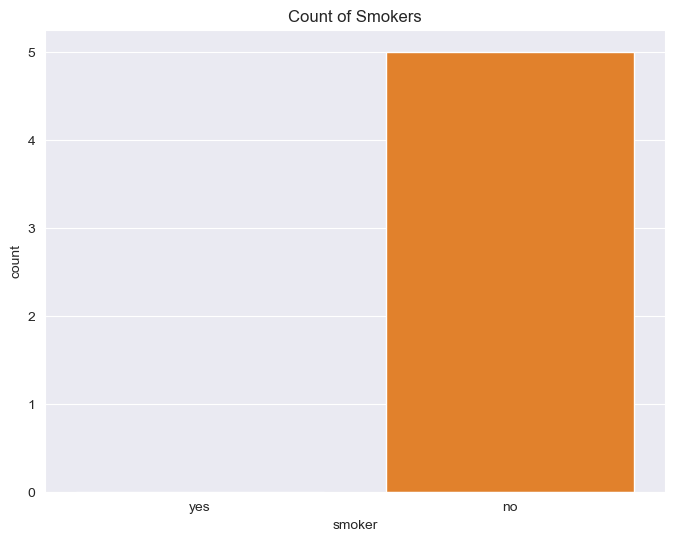

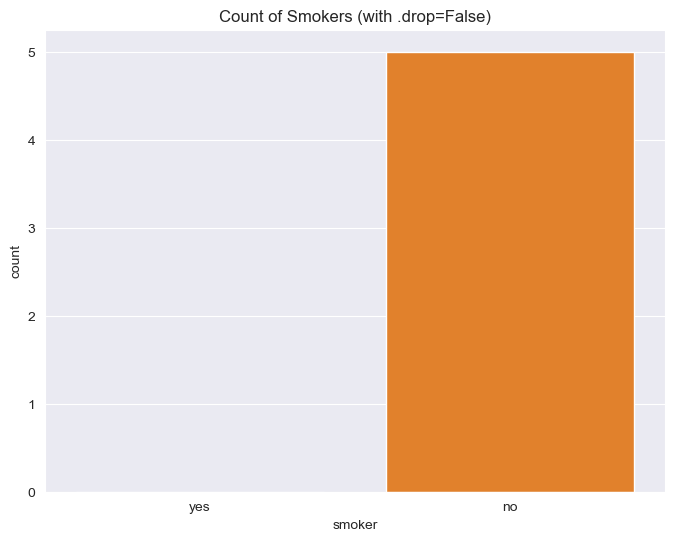

(array(['IAH', 'MIA', 'BQN', 'ATL', 'ORD', 'FLL', 'IAD', 'MCO', 'PBI',
        'TPA', 'LAX', 'SFO', 'DFW', 'BOS', 'LAS', 'MSP', 'DTW', 'RSW',
        'SJU', 'PHX', 'BWI', 'CLT', 'BUF', 'DEN', 'SNA', 'MSY', 'SLC',
        'XNA', 'MKE', 'SEA', 'ROC', 'SYR', 'SRQ', 'RDU', 'CMH', 'JAX',
        'CHS', 'MEM', 'PIT', 'SAN', 'DCA', 'CLE', 'STL', 'MYR', 'JAC',
        'MDW', 'HNL', 'BNA', 'AUS', 'BTV', 'PHL', 'STT', 'EGE', 'AVL',
        'PWM', 'IND', 'SAV', 'CAK', 'HOU', 'LGB', 'DAY', 'ALB', 'BDL',
        'MHT', 'MSN', 'GSO', 'CVG', 'BUR', 'RIC', 'GSP', 'GRR', 'MCI',
        'ORF', 'SAT', 'SDF', 'PDX', 'SJC', 'OMA', 'CRW', 'OAK', 'SMF',
        'TUL', 'TYS', 'OKC', 'PVD', 'DSM', 'PSE', 'BHM', 'CAE', 'HDN',
        'BZN', 'MTJ', 'EYW', 'PSP', 'ACK', 'BGR', 'ABQ', 'ILM', 'MVY',
        'SBN', 'LEX', 'CHO', 'TVC', 'ANC', 'LGA'], dtype=object),
 array(['N14228', 'N24211', 'N619AA', ..., 'N776SK', 'N785SK', 'N557AS'],
       dtype=object),
 no     5
 yes    0
 Name: smoker, dtype: int64,
 no     

In [6]:
# First, we will load the flights.csv data and then perform the operations equivalent to those in the R code.

# Load the data from the provided flights.csv
flights = pd.read_csv('data/flights.csv')

# Equivalent of `distinct(faa = dest)` and then `anti_join(airports)` in R
# Since the airports dataframe is not provided, this operation will only retrieve distinct 'dest' values.
distinct_dest = flights['dest'].unique()

# Equivalent of `distinct(tailnum)` and then `anti_join(planes)` in R
# Since the planes dataframe is not provided, this operation will only retrieve distinct 'tailnum' values.
distinct_tailnum = flights['tailnum'].dropna().unique()

# Creating the health dataframe equivalent in Python
health_data = {
    'name': ["Ikaia", "Oletta", "Leriah", "Dashay", "Tresaun"],
    'smoker': pd.Categorical(["no", "no", "no", "no", "no"], categories=["yes", "no"]),
    'age': [34, 88, 75, 47, 56],
}
health = pd.DataFrame(health_data)

# Counting the number of smokers using `value_counts()`
smoker_count = health['smoker'].value_counts()
smoker_count_drop_false = health['smoker'].value_counts(dropna=False)

# For the ggplot2 equivalent plots, we'll use matplotlib and seaborn in Python.
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the count of smokers
plt.figure(figsize=(8, 6))
sns.countplot(x='smoker', data=health)
plt.title('Count of Smokers')
plt.show()

# Plotting the count of smokers without dropping levels
# Since there are no "yes" categories in the data, this plot will be the same.
plt.figure(figsize=(8, 6))
sns.countplot(x='smoker', data=health)
plt.title('Count of Smokers (with .drop=False)')
plt.show()

# Group by 'smoker' and summarize the statistics.
# Since all entries are "no", this will yield only one group.
health_grouped = health.groupby('smoker', dropna=False).agg(
    n=('name', 'size'),
    mean_age=('age', 'mean'),
    min_age=('age', 'min'),
    max_age=('age', 'max'),
    sd_age=('age', 'std')
).reset_index()

# Creating vectors equivalent to R's c() function
x1 = pd.Series([np.nan, np.nan])
x2 = pd.Series(dtype='float')

# Length of x1 and x2 using len() in Python
length_x1 = len(x1)
length_x2 = len(x2)

# Group by 'smoker' and summarize the statistics followed by `complete`
# Since there is no `complete` function in pandas, we'll make sure that the output includes all categories.
health_grouped_complete = health.groupby('smoker').agg(
    n=('name', 'size'),
    mean_age=('age', 'mean'),
    min_age=('age', 'min'),
    max_age=('age', 'max'),
    sd_age=('age', 'std')
).reindex(pd.Categorical(["yes", "no"]).categories)

distinct_dest, distinct_tailnum, smoker_count, smoker_count_drop_false, health_grouped, length_x1, length_x2, health_grouped_complete
